In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


load a dataset

In [6]:
titanic=pd.read_csv('titanic.csv')

### information of the dataset

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
titanic.shape

(418, 12)

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
print(titanic.duplicated().sum())

0


### Handling missing values and Outliers 

In [14]:
titanic.drop(columns=['Cabin'], inplace=True)  

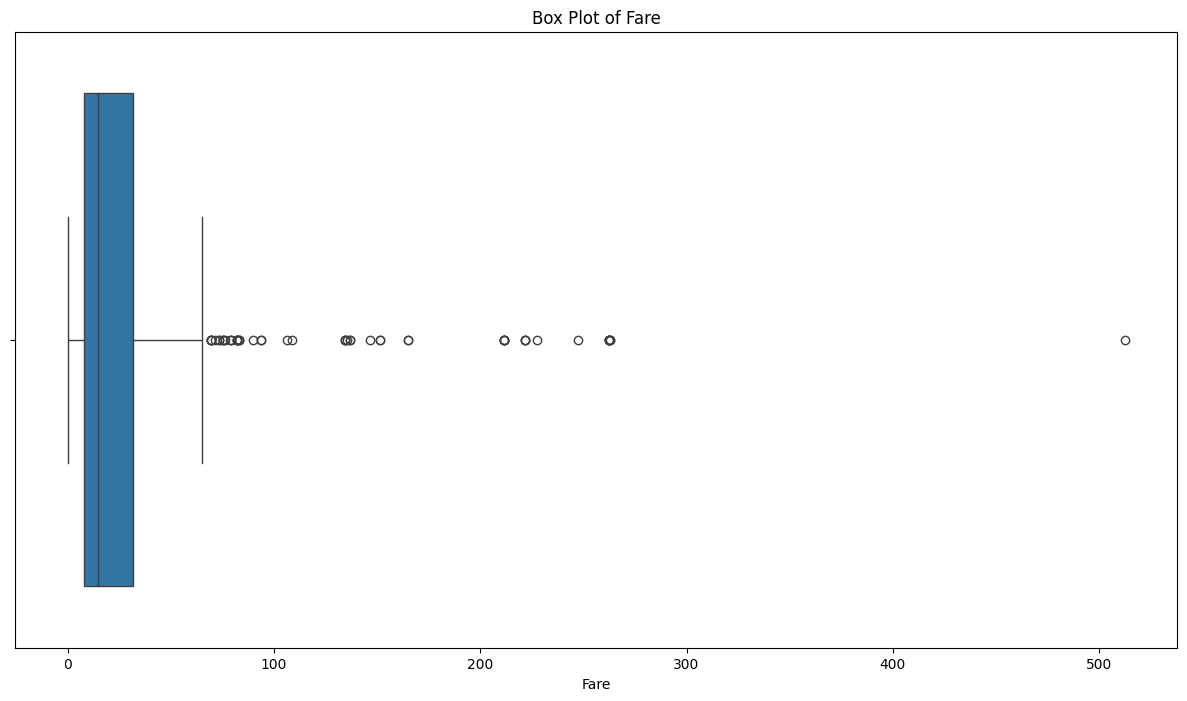

In [15]:
# Box plot for Fare
plt.figure(figsize=(15, 8))
sns.boxplot(x=titanic['Fare'])
plt.title('Box Plot of Fare')
plt.show()

In [16]:
Q1 = titanic['Fare'].quantile(0.25)
Q2 = titanic['Fare'].quantile(0.50)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 = {Q1}")
print(f"Q2 = mean = {Q2}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")


# Filter out outliers
outliers_Fare = (titanic['Fare'] <= lower_bound) & (titanic['Fare'] >= upper_bound)
print(outliers_Fare.sum())

Q1 = 7.8958
Q2 = mean = 14.4542
Q3 = 31.5
IQR = 23.6042
Lower bound = -27.5105
Upper bound = 66.9063
0


In [17]:
titanic.dropna(subset=['Fare'], inplace=True)

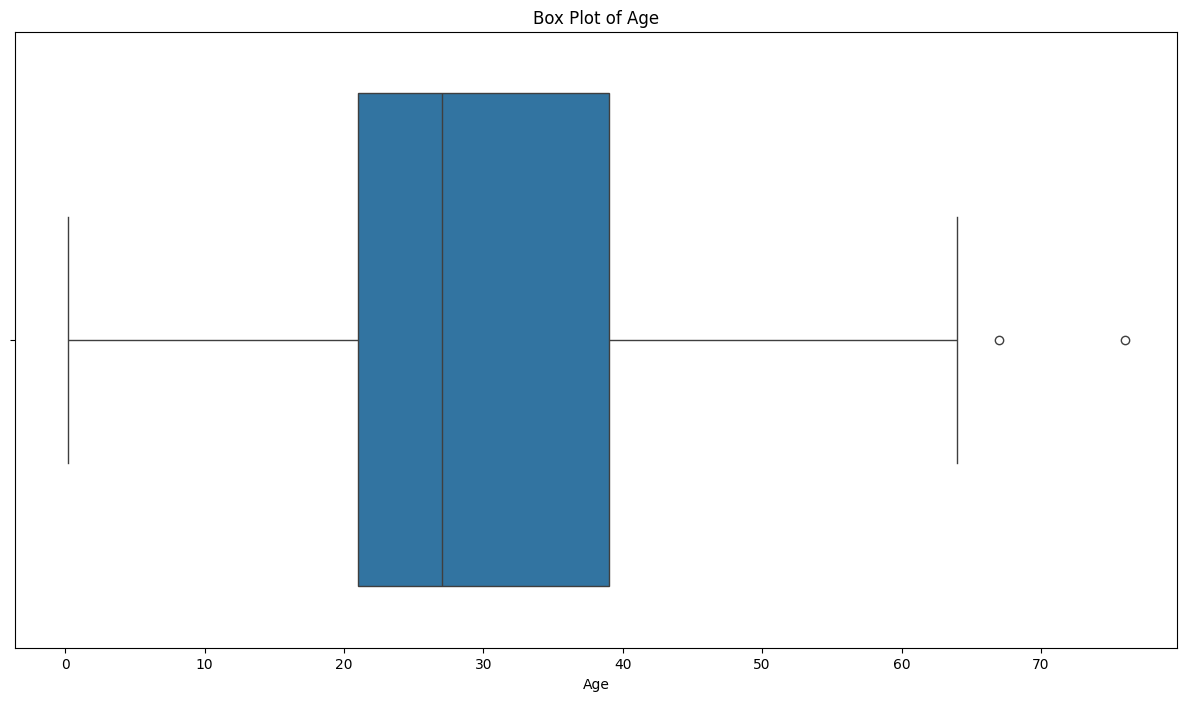

In [18]:
# Box plot for Age

plt.figure(figsize=(15, 8))
sns.boxplot(x=titanic['Age'])
plt.title('Box Plot of Age')
plt.show()

In [19]:
Q1 = titanic['Age'].quantile(0.25)
Q2 = titanic['Age'].quantile(0.50)
Q3 = titanic['Age'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 = {Q1}")
print(f"Q2 = mean = {Q2}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")


# Filter out outliers

outliers_age = (titanic['Age'] <= lower_bound) & (titanic['Age'] >= upper_bound)
print(outliers_age.sum())

Q1 = 21.0
Q2 = mean = 27.0
Q3 = 39.0
IQR = 18.0
Lower bound = -6.0
Upper bound = 66.0
0


In [20]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_444\2184073557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


###  data  after cleaning


In [21]:
titanic=titanic[~outliers_age | outliers_Fare]

# Check the updated shape and information of the dataset
print(titanic.shape)

(417, 11)


C:\Users\DELL\AppData\Local\Temp\ipykernel_444\2440929861.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  titanic=titanic[~outliers_age | outliers_Fare]


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [23]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,29.525180,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.628258,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
# Calculate the correlation between features (excluding 'Name' column)
corr_matrix = titanic.select_dtypes(include=['int64', 'float64']).corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.024117 -0.025800 -0.028926  0.003259  0.042650   
Survived       -0.024117  1.000000 -0.107203  0.012547  0.099136  0.158534   
Pclass         -0.025800 -0.107203  1.000000 -0.476790  0.002136  0.019581   
Age            -0.028926  0.012547 -0.476790  1.000000 -0.068791 -0.041699   
SibSp           0.003259  0.099136  0.002136 -0.068791  1.000000  0.306566   
Parch           0.042650  0.158534  0.019581 -0.041699  0.306566  1.000000   
Fare            0.008211  0.191514 -0.577147  0.347105  0.171539  0.230046   

                 Fare  
PassengerId  0.008211  
Survived     0.191514  
Pclass      -0.577147  
Age          0.347105  
SibSp        0.171539  
Parch        0.230046  
Fare         1.000000  


### start  data Visualization

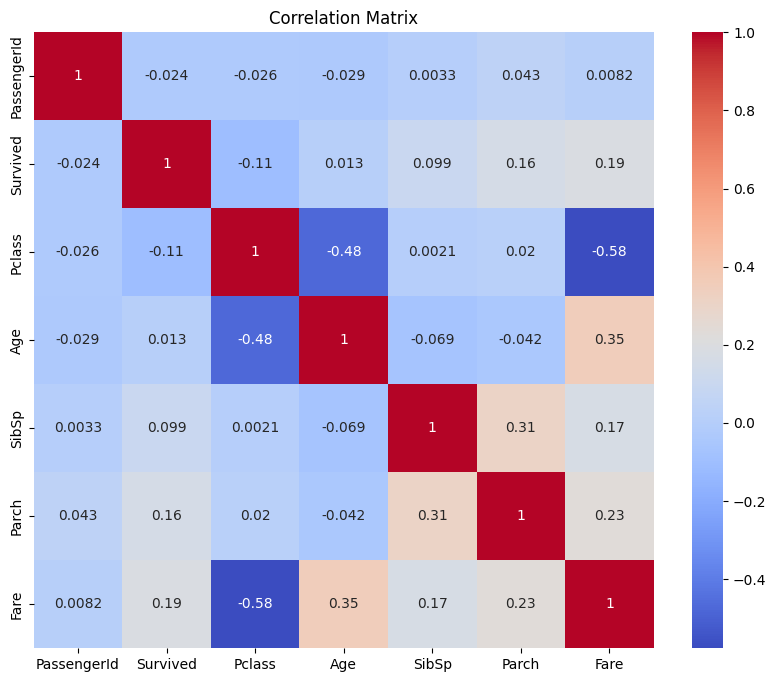

In [26]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

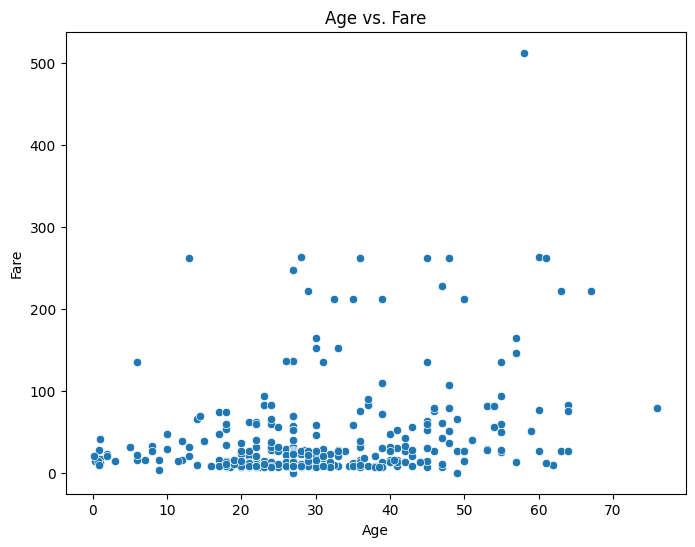

In [27]:
# Scatter plot of Age vs. Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x=titanic['Age'], y=titanic['Fare'])
plt.title('Age vs. Fare')
plt.show()

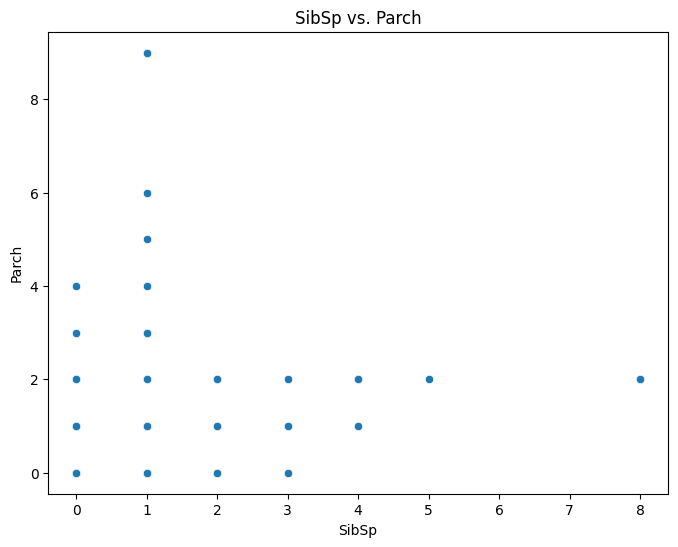

In [28]:
# Scatter plot of SibSp vs. Parch
plt.figure(figsize=(8, 6))
sns.scatterplot(x=titanic['SibSp'], y=titanic['Parch'])
plt.title('SibSp vs. Parch')
plt.show()


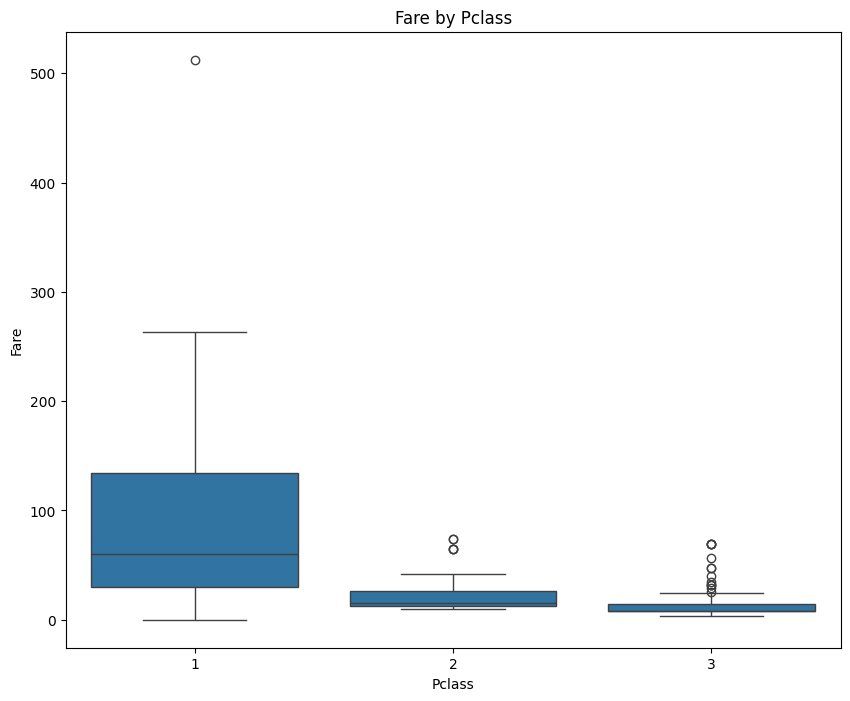

In [29]:
# Box plot of Fare by Pclass
plt.figure(figsize=(10, 8))
sns.boxplot(x=titanic['Pclass'], y=titanic['Fare'])
plt.title('Fare by Pclass')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_444\3728744074.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic.groupby(age_groups)['Survived'].mean()


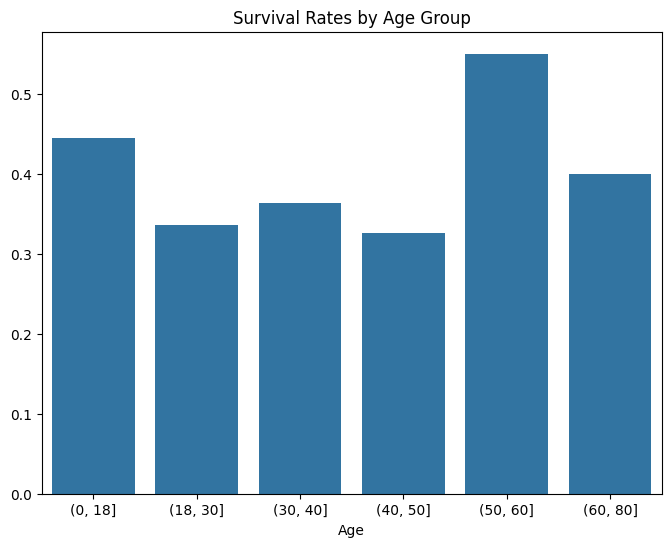

In [30]:
# Bar plot of Survival Rates by Age Group
age_groups = pd.cut(titanic['Age'], bins=[0, 18, 30, 40, 50, 60, 80])
survival_rates = titanic.groupby(age_groups)['Survived'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Survival Rates by Age Group')
plt.show()

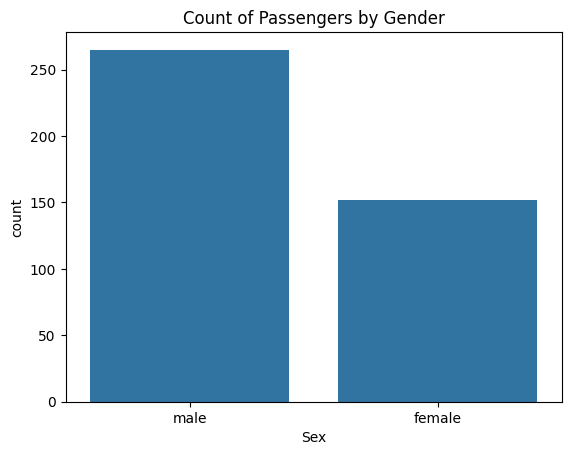

In [31]:
sns.countplot(x='Sex', data=titanic)
plt.title('Count of Passengers by Gender')
plt.show()

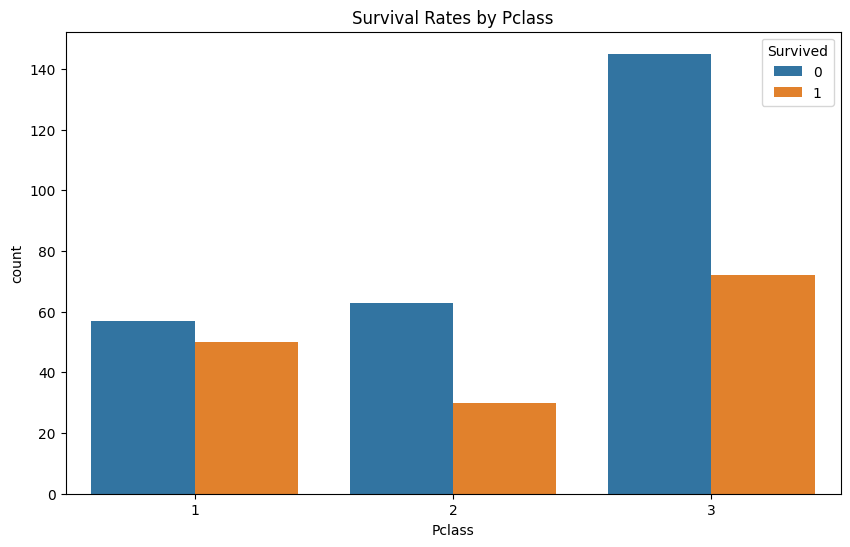

In [32]:
# Bar plot of Survival Rates by Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x=titanic['Pclass'], hue=titanic['Survived'])
plt.title('Survival Rates by Pclass')
plt.show()

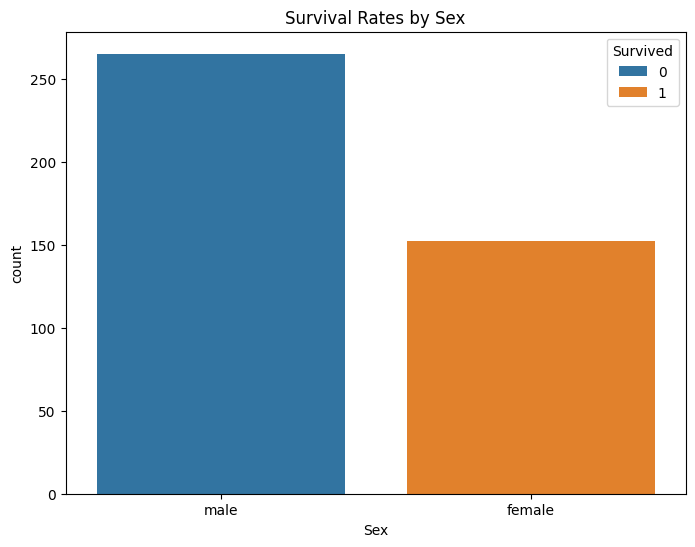

In [33]:
# Bar plot of survival rates by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Rates by Sex')
plt.show()

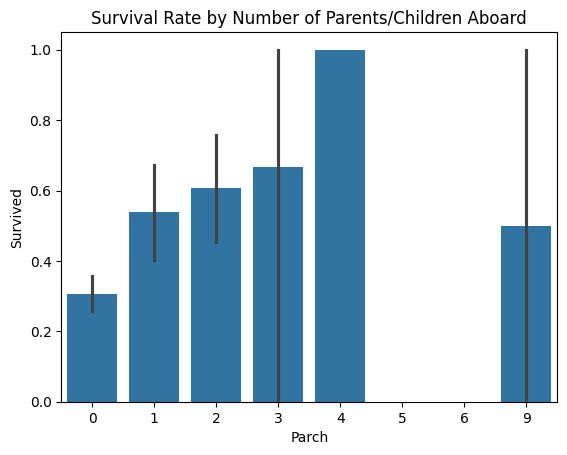

In [34]:
sns.barplot(x='Parch', y='Survived', data=titanic)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

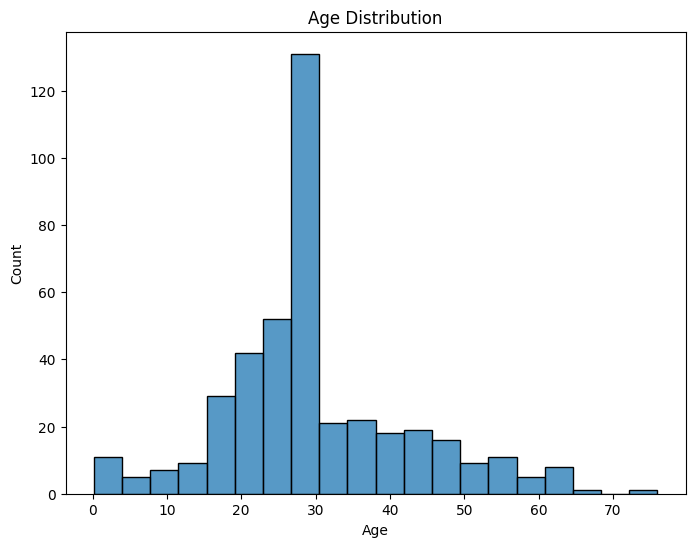

In [35]:
# Histogram of ages
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

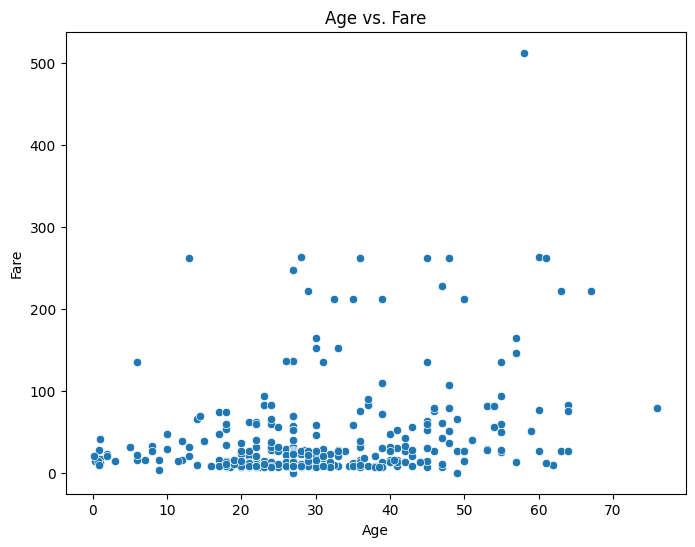

In [36]:
# Scatter plot of age vs. fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic)
plt.title('Age vs. Fare')
plt.show()

In [37]:
# Calculate the survival rate by age group
age_groups = pd.cut(titanic['Age'], bins=[0, 18, 30, 40, 50, 60, 80])
survival_rates = titanic.groupby(age_groups)['Survived'].mean()
print(survival_rates)

Age
(0, 18]     0.444444
(18, 30]    0.336207
(30, 40]    0.363636
(40, 50]    0.326087
(50, 60]    0.550000
(60, 80]    0.400000
Name: Survived, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_444\2589932002.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic.groupby(age_groups)['Survived'].mean()


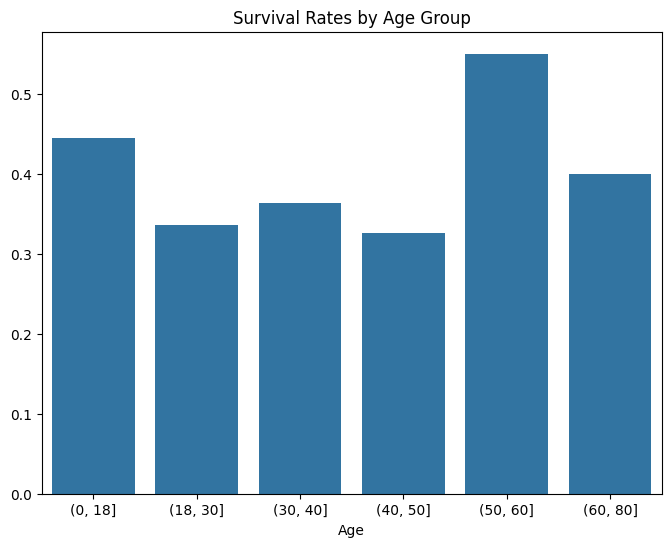

In [38]:
# Bar plot of survival rates by age group
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Survival Rates by Age Group')
plt.show()

In [39]:
# Calculate the survival rate by embarkation point
embarkation_points = titanic['Embarked'].unique()
survival_rates_embark = titanic.groupby('Embarked')['Survived'].mean()
print(survival_rates_embark)

Embarked
C    0.392157
Q    0.521739
S    0.327138
Name: Survived, dtype: float64


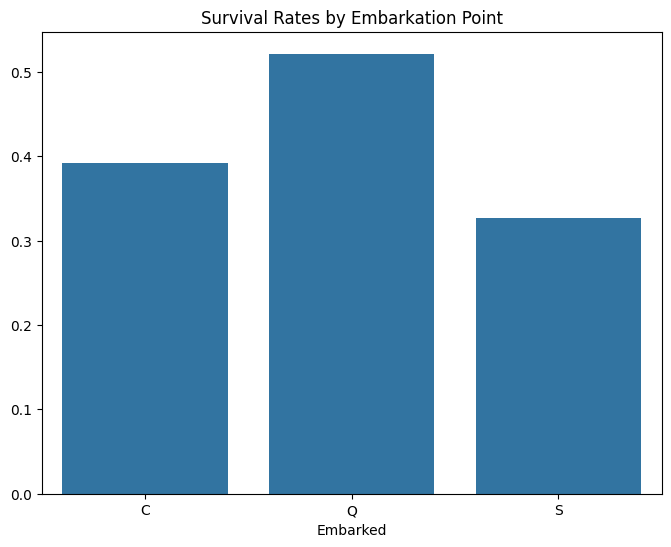

In [40]:

# Bar plot of survival rates by embarkation point
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates_embark.index, y=survival_rates_embark.values)
plt.title('Survival Rates by Embarkation Point')
plt.show()

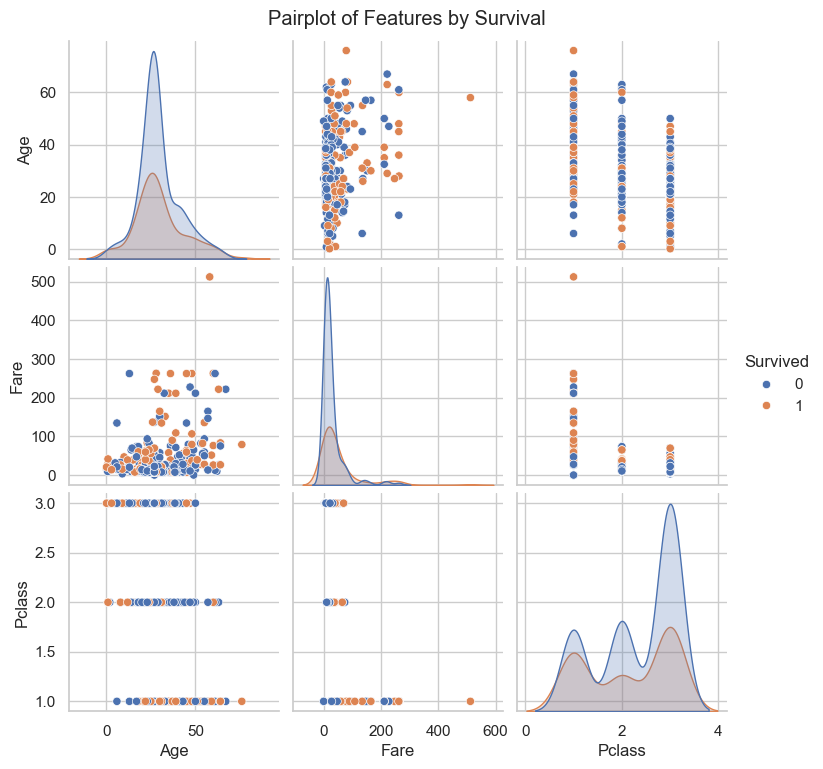

In [41]:
# Create a pairplot with enhanced aesthetics
sns.set(style="whitegrid")
pairplot = sns.pairplot(titanic, hue='Survived',vars=['Age', 'Fare', 'Pclass'])
plt.suptitle('Pairplot of Features by Survival', y=1.02)  
plt.show()

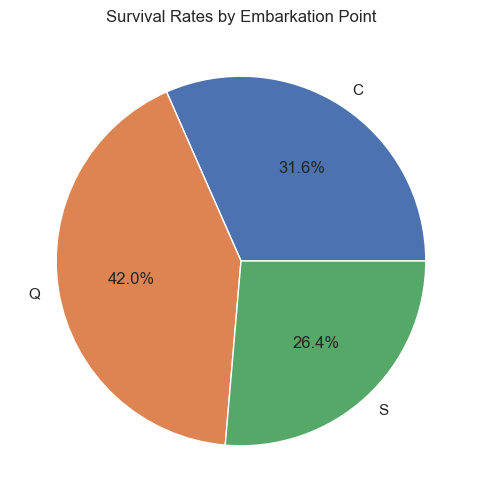

In [46]:
#pie chart to survive rates by embarkation point
plt.figure(figsize=(8, 6))
plt.pie(survival_rates_embark.values, labels=survival_rates_embark.index, autopct='%1.1f%%')
plt.title('Survival Rates by Embarkation Point')
plt.show()